In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
sys.path.append('/storage/user/christiw/.local/bin')

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [4]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = 2016
version = '/v8/'
pdgId = 11
if year == 2016:
    path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Summer16/v11/'+version
    bkg_path = path+'/bkg/wH/normalized/'
    sig_path = path+'/signals/wH/normalized/'
    fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
    fpath_bkg['bbbb10'] = sig_path+"/WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root"
    
elif year == 2017:
    path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Fall17/v12/'+version+'/bkg/wH/normalized/'
    fpath_bkg['WJetsToLNu'] = path+"WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
elif year == 2018:
    path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Autumn18/v12/'+version+'/bkg/wH/normalized/'
    fpath_bkg['WJetsToLNu'] = path+"WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
else:
    print("YEAR ERROR")

# fpath_bkg['QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['DYJetsToLL'] = bkg_path+"DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_DiLept'] = bkg_path+"TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromTbar'] = bkg_path+"TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromT'] = bkg_path+"TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu'] = bkg_path+"ZJetsToNuNu_Zpt-100toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root"

In [2]:
start_t = time.time()

if year == 2016:lumi = 35.92*1000 #in pb-1
elif year == 2017:lumi = 41.53 * 1000
else: lumi = 59.74 * 1000
    
data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/Data'+str(year)+'/v12/v8/wH/normalized/'
if pdgId == 13:
    fpath_bkg['SingleMuon'] = data_path + 'SingleMuon.root'
else:
    if year == 2018:
        fpath_bkg['SingleElectron'] = data_path + 'EGamma.root'
    else:
        fpath_bkg['SingleElectron'] = data_path + 'SingleElectron.root'


NEvents = {}

for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
#     if k[:7] == 'ntuples':
#         tree_bkg[k] = root_dir['ntuples']['llp']
#         NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     else:
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k])
    print ('weights',np.unique(a)*lumi)
    print(np.sum(a))
    print(len(a))
#     print(len(a)/ NEvents[k])
#     print(a.shape)
print(time.time()-start_t)

WJetsToLNu /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Summer16/v11//v8//bkg/wH/normalized/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root
NEvents 257621280.0
weights [-12.530317  12.530317]
13257.858
56244440
bbbb10 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Summer16/v11//v8//signals/wH/normalized//WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root
NEvents 49995.0
weights [-0.41436443 -0.26293814  0.26293814  0.41436443]
0.16819596
18572
SingleElectron /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/Data2016/v12/v8/wH/normalized/SingleElectron.root
NEvents 895246700.0
weights [35920.]
175819100.0
175819110
95.63914918899536


# Load trigger

In [3]:
trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
if wH:
    if pdgId == 13: trigger_paths = [135]
    else:
        if year == 2016:
            trigger_paths = [79]
        else:
            trigger_paths = [87]
#     elif data_year == 2017: trigger_paths = [87,136] #PFMET120
else:
    trigger_paths = [177,362,87,135] #PFMET120

xsec = {}
xsec['bbbb10m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb1m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb0.1m'] = (5.328E-01 + 8.4E-01) *0.324


xsec['WJetsToLNu'] = 61526.7

legend = {}
legend['bbbb10'] = 'signal c#tau = 10 m'
legend['bbbb1'] = 'signal c#tau = 1 m'
legend['bbbb0.1'] = 'signal c#tau = 0.1 m'

legend['SingleElectron'] = 'SingleElectron'
legend['SingleMuon'] = 'SingleMuon'
legend['WJetsToLNu'] = 'WJetsToLNu'

# Helper Functions

In [4]:
import math
def deltaPhi( phi1,  phi2):
    dphi = phi1-phi2
    while (dphi > math.pi):
        dphi -= 2*math.pi
    while (dphi <= -math.pi):
        dphi += 2*math.pi
    return dphi
def deltaR(eta1, phi1, eta2, phi2):
    dphi = deltaPhi(phi1,phi2)
    deta = eta1 - eta2
    return (dphi*dphi + deta*deta)**0.5

# Lepton Variables to check normalization

In [5]:
start_t = time.time()
JET_PT_CUT = 10
MUON_PT_CUT = 20

weight = {}
lepPt = {}
lepEta = {}
MT = {}
met = {}


for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue

    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])

    sel_lep = np.abs(T.array('lepPdgId')) == pdgId
    sel_lep = np.logical_and(sel_lep, T.array('lepPassId') == True)
#     trigger_paths_temp = [135, 77, 79, 81 ,84,87,88]
#     for tr in trigger_paths_temp:            
#         print(tr, 1.0*np.count_nonzero(np.logical_and(hlt[:,tr],sel_lep))/np.count_nonzero(sel_lep))


#     if k[:6] == 'Single' or k == 'EGamma':
#          print("trigged+loose",k,np.sum(T.array('weight')[sel_ev]))
#     else:
#         print("trigger+loose",k,np.sum(T.array('weight')[sel_ev]*lumi))
   
    sel_ev = np.logical_and(sel_ev, sel_lep.sum() == 1)
    
#     if k[:6] == 'Single' or k == 'EGamma':
#          print("trigged+tight",k,np.sum(T.array('weight')[sel_ev]))
#     else:
#         print("trigger+tight",k,np.sum(T.array('weight')[sel_ev]*lumi))

#     sel_ev = np.logical_and(sel_ev, T.array('MT') > 50)
    
    lepPt[k] = T.array('lepPt')[sel_ev][:,0]
    lepEta[k] = T.array('lepEta')[sel_ev][:,0]
    met[k] = T.array('met')[sel_ev]
    MT[k] = T.array('MT')[sel_ev]


    if k[:6] == 'Single' or k == 'EGamma':
        weight[k] = T.array('weight')[sel_ev]
    else:
        weight[k] = T.array('weight')[sel_ev]*lumi
    print(k,time.time()-start_t)

print(time.time()-start_t)

WJetsToLNu 460.1770906448364
bbbb10 461.3470938205719
SingleElectron 1835.1791820526123
1835.1794803142548


In [2]:
import pickle
pdgId = 11
if pdgId == 13: filename = 'singlemuon2016.pickle'
else: filename = 'singleelectron2016.pickle'
# with open('singleelectron2016.pickle', 'wb') as f:
#     pickle.dump([weight, lepPt, lepEta, MT, met], f)
with open(filename, 'rb') as f:
    [weight, lepPt, lepEta, MT, met] = pickle.load(f)

# 2D ROC curve

0
10
20
0
10
20
0
10
20
(36,) (36,)
time used: 46.87119913101196


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


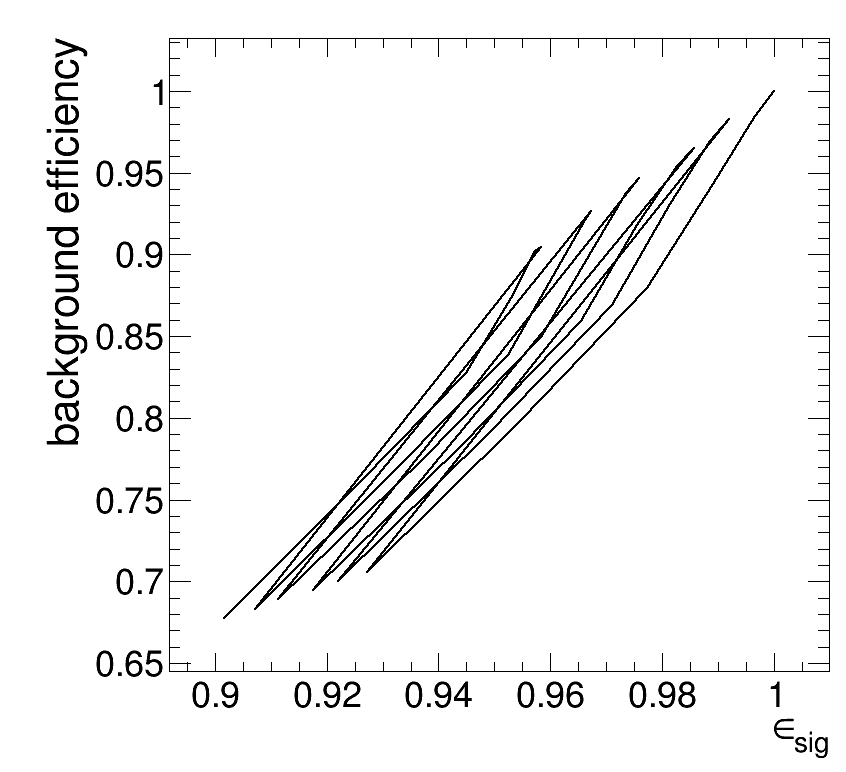

In [27]:
 #ROC curve
start_t = time.time()
c = rt.TCanvas('c','c', 850, 800)
leg = rt.TLegend(0.5,0.80,0.85,0.90)
leg = rt.TLegend(0.3,0.80,0.55,0.90)

leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
gr = {}
var = [met, MT]
name = ['MET','MT']
if pdgId == 13: qcd_key = 'SingleMuon'
else: qcd_key = 'SingleElectron'
# sig_k = 'bbbb1m'
thre = np.array(range(0,30,5))
keys = ['bbbb10']
for j,sig_k in enumerate(keys):
    eff = {}
  
    for k in weight.keys():
        eff[k] = []
        for th in thre:
            for th2 in thre:
                cond = np.logical_and(MT[k]>th, met[k]>th2)
                eff[k].append(1.0*np.sum(weight[k][cond])/np.sum(weight[k]))
                
            if th%10 == 0:
                print(th)
        eff[k] = np.array(eff[k])
#     Plotting ROC curve
    eff[sig_k] = eff[sig_k][np.logical_not(eff[qcd_key] <= 0)]
    eff[qcd_key] = eff[qcd_key][np.logical_not(eff[qcd_key] <= 0)]
#     print(eff[qcd_key])
    print(eff[qcd_key].shape, eff[sig_k].shape)
    gr[sig_k] = create_TGraph(eff[sig_k],eff[qcd_key],axis_title = ['#epsilon_{sig}','background efficiency'])
#     temp=list(zip(eff[sig_k],eff[qcd_key]))
#     print(temp)
#         gr[name[i]+sig_k] = create_TGraph(np.reciprocal(eff[qcd_key]),eff[sig_k],axis_title = ['background rejection','#epsilon_{sig}'])
#     gr[name[i]].SetLineColor(std_color_list[int(i/2)])
#     gr[name[i]].SetLineStyle(std_color_list[i%2])
#     gr[sig_k].SetLineColor(std_color_list[i])
#         gr[name[i]+sig_k].SetLineStyle(j+1)
    gr[sig_k].SetLineWidth(2)
#     gr[sig_k].GetYaxis().SetTitleOffset(1.5)

#     gr[sig_k].GetYaxis().SetRangeUser(0,1)
#     gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


#     leg.AddEntry(gr[sig_k],name[i])

    gr[sig_k].Draw('')
    c.SetLeftMargin(0.2)
#     leg.Draw()
#     value = 0.95 #target signal efficiency
#     ind = np.abs(eff[sig_k]-value).argmin()
# #     ind = 110
#     print(sig_k,1.0/eff[qcd_key][ind])
# #         print(name[i],eff[sig_k][ind])
#     print(thre[ind])

# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')
print('time used: '+str(time.time()-start_t))

[0, 5, 10, 15, 20, 25]


# ROC curve for MT cut

here
(250,) (250,)
bbbb10 1.1526394145936238
17
here


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater


(250,) (250,)
bbbb10 1.111956365006917
24
time used: 692.7170596122742


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


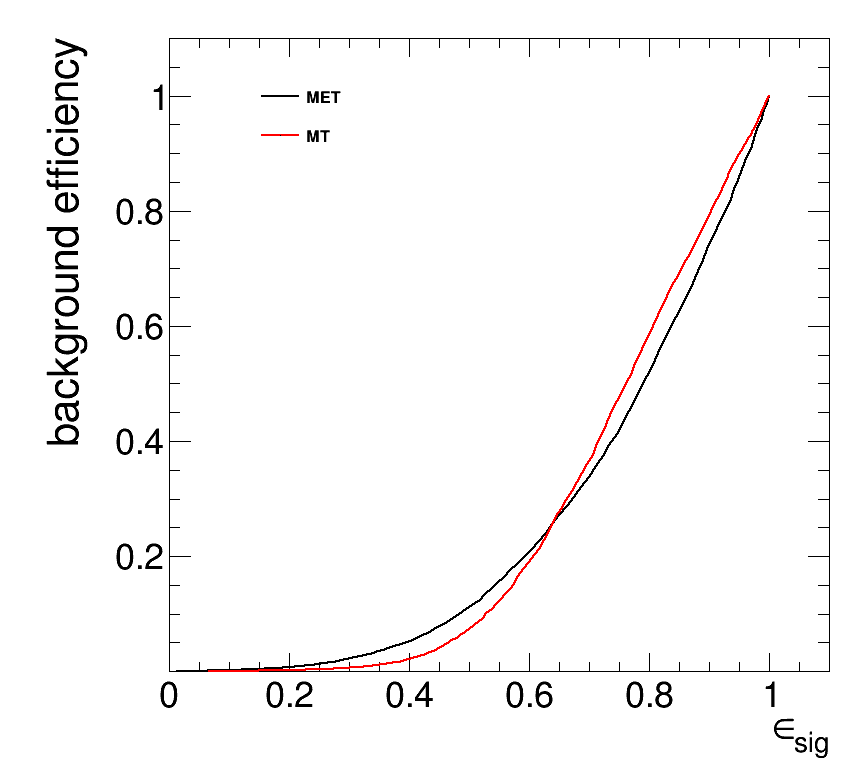

In [14]:
#ROC curve
start_t = time.time()
c = rt.TCanvas('c','c', 850, 800)
leg = rt.TLegend(0.5,0.80,0.85,0.90)
leg = rt.TLegend(0.3,0.80,0.55,0.90)

leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
gr = {}
var = [met, MT]
name = ['MET','MT']
if pdgId == 13: qcd_key = 'SingleMuon'
else: qcd_key = 'SingleElectron'
# sig_k = 'bbbb1m'
thre = np.array(range(250))
keys = ['bbbb10']
for j,sig_k in enumerate(keys):
    eff = {}
    for i in range(len(var)):
        print('here')
        for k in weight.keys():
            v = var[i][k]
            eff[k] = []
            for th in thre:
                eff[k].append(1.0*np.sum(weight[k][v>th])/np.sum(weight[k]))
            eff[k] = np.array(eff[k])
    #     Plotting ROC curve
        eff[sig_k] = eff[sig_k][np.logical_not(eff[qcd_key] <= 0)]
        eff[qcd_key] = eff[qcd_key][np.logical_not(eff[qcd_key] <= 0)]
    #     print(eff[qcd_key])
        print(eff[qcd_key].shape, eff[sig_k].shape)
        gr[sig_k+str(i)] = create_TGraph(eff[sig_k],eff[qcd_key],axis_title = ['#epsilon_{sig}','background efficiency'])


    #         gr[name[i]+sig_k] = create_TGraph(np.reciprocal(eff[qcd_key]),eff[sig_k],axis_title = ['background rejection','#epsilon_{sig}'])
    #     gr[name[i]].SetLineColor(std_color_list[int(i/2)])
    #     gr[name[i]].SetLineStyle(std_color_list[i%2])
        gr[sig_k+str(i)].SetLineColor(std_color_list[i])
    #         gr[name[i]+sig_k].SetLineStyle(j+1)
        gr[sig_k+str(i)].SetLineWidth(2)
    #     gr[sig_k].GetYaxis().SetTitleOffset(1.5)

    #     gr[sig_k].GetYaxis().SetRangeUser(0,1)
    #     gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    #         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


        leg.AddEntry(gr[sig_k+str(i)],name[i])

        gr[sig_k+str(i)].Draw('ac' if i == 0 else 'c')
        c.SetLeftMargin(0.2)
        leg.Draw()
        value = 0.95 #target signal efficiency
        ind = np.abs(eff[sig_k]-value).argmin()
    #     ind = 110
        print(sig_k,1.0/eff[qcd_key][ind])
    #         print(name[i],eff[sig_k][ind])
        print(thre[ind])

# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')


print('time used: '+str(time.time()-start_t))


# Data/MC plot

SingleMuon 299084740.0
SingleMuon 299084740.0
WJetsToLNu 288340100.0
WJetsToLNu 288340100.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio


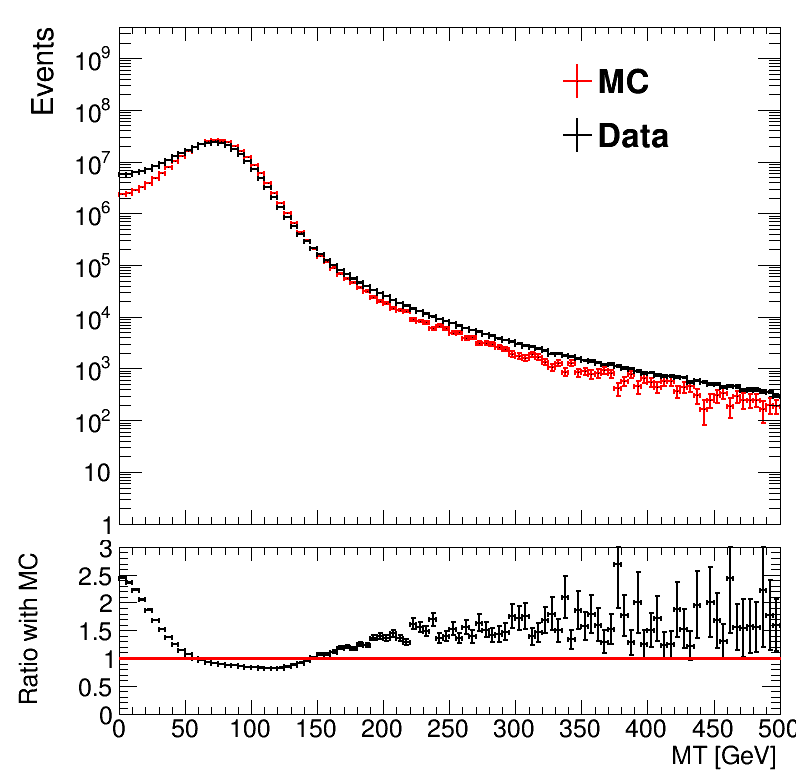

In [24]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

h = {}
rt.gStyle.SetOptFit(1011)
if pdgId == 13: data = 'SingleMuon'
else: data = 'SingleElectron'
mc = 'WJetsToLNu'
keys = [data, mc ]
for i,k in enumerate(keys):
#     w = cscClusterNLayer[k]*0.0 + weight[k]
#     print(len(w.flatten()))
#     print(len(cscClusterNLayer[k].flatten()))
#     h[k] = create_TH1D( cscClusterNLayer[k].flatten(), axis_title=['cluster station', 'Events'], name=k, binning=[10,0,10],weights = w.flatten())
#     h[k] = create_TH1D( nCscClusters[k], axis_title=['Number of Clusters', 'Events'], name=k, binning=[10,0,10],weights = weight[k])

#     h[k] = create_TH1D( cscClusterNLayer[k].sum(), axis_title=['Number of Stations per Event', 'Events'], name=k, binning=[10,0,10],weights = weight[k])
    print(k, np.sum(weight[k]))

#     print(len(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]))
#     h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], axis_title=['nCsc', 'Events'], name=k, binning=[20,0,100],weights = weight[k])
#     h[k] = create_TH1D( lepPt[k], axis_title=['lepton pT [GeV]', 'Events'], name=k, binning=[100,0,500],weights = weight[k])
    cond = met[k]>=0
    print(k, np.sum(weight[k][cond]))
#     h[k] = create_TH1D( met[k][cond], axis_title=['met [GeV]', 'Events'], name=k, binning=[100,0,100],weights = weight[k][cond])
    h[k] = create_TH1D( MT[k][cond], axis_title=['MT [GeV]', 'Events'], name=k, binning=[100,0,500],weights = weight[k][cond])
#     h[k] = create_TH1D( lepEta[k], axis_title=['lepton #eta [GeV]', 'Events'], name=k, binning=[20,-2.4,2.4],weights = weight[k])



    h[k].SetLineColor(std_color_list[i])
#     leg.AddEntry(h[k], legend[k])
#     h[k].SetMinimum(1)

#     if k == data:
#         r = h[k].Fit('expo', 'LRSQ+', '', 20,120)
#         print(r.Get())
#         print(r.Prob())
#         h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#         h[k].GetFunction("expo").SetLineWidth(2)


#     h[k].Draw('hist same')


c = make_ratio_plot([h[mc],h[data]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
# c.SetRightMargin(0)
# c.SetLogy()


c.Draw()

    
    


# c.Draw()
# print(time.time()-start_t)

# nCsc with different hit vetoing

In [ ]:
start_t = time.time()
JET_PT_CUT = 10
MUON_PT_CUT = 20

weight = {}
weight_event = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}

nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
cscClusterSize = {}

cscClusterTime = {}

selections_cluster = {}
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
########### SELECTION: CLUSTERS ############

    ###### OOT control region #####
#     sel_cluster_temp = T.array('cscClusterMaxLayerRatio')*T.array('cscClusterSize') > 5.01
    sel_cluster_temp = T.array('cscClusterMaxStationRatio')*T.array('cscClusterSize') > 5.01



#     sel_cluster_temp = T.array('cscClusterJetVeto') < JET_PT_CUT
#     sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterMuonVeto') < MUON_PT_CUT)
    sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterMe11Ratio') < 0.01)
    sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterMe12Ratio') < 0.01)
    
#     sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterMe1112Ratio') < 0.01)
#     flip = np.count_nonzero( T.array('cscClusterMe1112Ratio').flatten() >= 0.01)*0.5
#     print("flip",flip)
#     counter = 0
#     for i in range(len(sel_cluster_temp)):
#         for j in range(len(sel_cluster_temp[i])):
#             if counter > flip: break
#             if (not sel_cluster_temp[i][j]) and counter < flip:
#                 counter+=1
#                 sel_cluster_temp[i][j] = True
#     print(time.time()-start_t)
#     sel_cluster_temp = np.logical_and(sel_cluster_temp, T.array('cscClusterMaxLayerRatio')*T.array('cscClusterSize') > 5.01)

    selections_cluster['oot'] = np.logical_or(T.array('cscClusterTime') > 37.5, T.array('cscClusterTime') < -12.5)

#     selections_cluster['test'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -53)
#     selections_cluster['test'] = np.logical_and(selections_cluster['test'], T.array('cscClusterTime') > -87.5)
    
#     selections_cluster['oot1'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -28)
#     selections_cluster['oot1'] = np.logical_and(selections_cluster['oot1'], T.array('cscClusterTime') > -62.5)
    
#     selections_cluster['oot2'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -12.5)
#     selections_cluster['oot2'] = np.logical_and(selections_cluster['oot2'], T.array('cscClusterTime') > -37.5)

#     selections_cluster['oot3'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 72)
#     selections_cluster['oot3'] = np.logical_and(selections_cluster['oot3'], T.array('cscClusterTime') > 37.5)
    
#     selections_cluster['oot4'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 97)
#     selections_cluster['oot4'] = np.logical_and(selections_cluster['oot4'], T.array('cscClusterTime') > 62.5)
    
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot1'], selections_cluster['oot2'])
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot_total'], selections_cluster['oot3'])
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot_total'], selections_cluster['oot4'])

    sel_cluster = np.logical_and(selections_cluster['oot'], sel_cluster_temp)


    ###### in time control region #####
    
#     sel_cluster = T.array('cscClusterJetVeto') > JET_PT_CUT
#     sel_cluster = np.logical_or( sel_cluster, T.array('cscClusterMuonVeto') > MUON_PT_CUT)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterMe1112Ratio') > 0.01)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterTime') > -12.5)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterTime') < 22) 
            
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
#     sel_muon = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=25)
#     sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepEta'))<2.4)
#     sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepPdgId')) == 13)

#     sel_ele = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=35)
#     sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepEta'))<2.4)
#     sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPdgId')) == 11)
    
#     sel_lep = np.logical_or(sel_ele, sel_muon)
    sel_lep = np.abs(T.array('lepPdgId')) == pdgId
   
    sel_ev = np.logical_and(sel_ev, sel_lep.sum() == 1)
    ##### jet veto #####
    sel_jetveto = np.logical_and(sel_ev, (sel_cluster.sum()) >= 1)

#     if k == "WJetsToLNu":
#         print("-3 bunch crossing",lumi*np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['test'].sum()) >= 1)]))
#         print("-2 bunch crossing",lumi*np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot1'].sum()) >= 1)]))
#         print("-1 bunch crossing",lumi*np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot2'].sum()) >= 1)]))
#         print("+2 bunch crossing",lumi*np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot3'].sum()) >= 1)]))
#         print("+3 bunch crossing",lumi*np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot4'].sum()) >= 1)]))
#     else:
#         print("-3 bunch crossing",np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['test'].sum()) >= 1)]))
#         print("-2 bunch crossing",np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot1'].sum()) >= 1)]))
#         print("-1 bunch crossing",np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot2'].sum()) >= 1)]))
#         print("+2 bunch crossing",np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot3'].sum()) >= 1)]))
#         print("+3 bunch crossing",np.sum(T.array('weight')[np.logical_and(sel_ev, (selections_cluster['oot4'].sum()) >= 1)]))

    cscClusterTime[k] =  T.array('cscClusterTime')[sel_cluster][sel_jetveto]
    cscClusterSize[k] =  T.array('cscClusterSize')[sel_cluster][sel_jetveto]

    ##### event variables #####
#     lumiSec[k] = T.array('lumiSec')[sel_jetveto]
#     evtNum[k] = T.array('evtNum')[sel_jetveto]
#     runNum[k] = T.array('runNum')[sel_jetveto]
#     npv[k] = T.array('npv')[sel_jetveto]
    if k[:6] == 'Single' or k == 'EGamma':
        weight[k] = T.array('weight')[sel_jetveto]
    else:
        weight[k] = T.array('weight')[sel_jetveto]*lumi

#     nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k].sum()

print(time.time()-start_t)

# Data/MC Ratio plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

h = {}
rt.gStyle.SetOptFit(1011)
if pdgId == 13: data = 'SingleMuon'
else: data = 'SingleElectron'
mc = 'WJetsToLNu'
keys = [data,mc ]
for i,k in enumerate(keys):
#     w = cscClusterNLayer[k]*0.0 + weight[k]
#     print(len(w.flatten()))
#     print(len(cscClusterNLayer[k].flatten()))
#     h[k] = create_TH1D( cscClusterNLayer[k].flatten(), axis_title=['cluster station', 'Events'], name=k, binning=[10,0,10],weights = w.flatten())
#     h[k] = create_TH1D( nCscClusters[k], axis_title=['Number of Clusters', 'Events'], name=k, binning=[10,0,10],weights = weight[k])

#     h[k] = create_TH1D( cscClusterNLayer[k].sum(), axis_title=['Number of Stations per Event', 'Events'], name=k, binning=[10,0,10],weights = weight[k])
    print(np.sum(weight[k]))

#     print(len(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]))
#     h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], axis_title=['nCsc', 'Events'], name=k, binning=[20,0,100],weights = weight[k])
    h[k] = create_TH1D( cscClusterTime[k][:,0], axis_title=['csc cluster time [ns]', 'Events'], name=k, binning=[100,-100,100],weights = weight[k])

    h[k].SetLineColor(std_color_list[i])
#     leg.AddEntry(h[k], legend[k])
#     h[k].SetMinimum(1)

#     if k == data:
#         r = h[k].Fit('expo', 'LRSQ+', '', 20,120)
#         print(r.Get())
#         print(r.Prob())
#         h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#         h[k].GetFunction("expo").SetLineWidth(2)


#     h[k].Draw('hist same')


c = make_ratio_plot([h[mc],h[data]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
# c.SetRightMargin(0)
c.SetLogy()


c.Draw()

    
    


# c.Draw()
# print(time.time()-start_t)

# Data/MC veto efficiency plot

In [ ]:
start_t = time.time()
# pdgId = 13
JET_PT_CUT = 10
MUON_PT_CUT = 20

weight = {}
weight_event = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
rho = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
cscClusterMe11veto = {}
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
    if k == 'WJetsToLNu': continue
    ###### OOT control region #####

    
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterMe1112Ratio') < 0.01)
    sel_cluster[k] = T.array('cscClusterMaxStationRatio')*T.array('cscClusterSize') > 5.01
#     sel_cluster[k] = np.logical_and( sel_cluster[k], T.array('cscClusterTime') > -12.5)
#     sel_cluster[k] = np.logical_and( sel_cluster[k], T.array('cscClusterTime') < 22) 
#     sel_cluster[k] = np.logical_and( sel_cluster[k],T.array('cscClusterJetVeto') < JET_PT_CUT)
#     sel_cluster[k] = np.logical_and( sel_cluster[k], T.array('cscClusterMuonVeto') < MUON_PT_CUT)
    sel_cluster[k] = np.logical_and(sel_cluster[k], T.array('cscClusterTime') < -12.5)
    sel_cluster[k] = np.logical_and(sel_cluster[k], T.array('cscClusterTime') > -62.5)
    cscClusterMe11veto[k] = T.array('cscClusterSize')*0.0
    print(k,"here")
#     for ev in range(len(cscClusterMe11veto[k])):
#         station = np.abs(T.array('cscStation')[ev]) == 11
#         cscLabels = T.array('cscLabels')[ev]
#         for cluster in range(len(cscClusterMe11veto[k][ev])):
#             # choose stations where the labels is this cluster
#             temp = np.logical_and(cscLabels == cluster, station)
#             if np.count_nonzero(temp) > 0:cscClusterMe11veto[k][ev][cluster] = 1
#         if ev%1000 == 0:
#             print(ev)
    print("here")
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
    sel_muon = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=25)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepEta'))<2.4)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepPdgId')) == 13)

    sel_ele = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=35)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepEta'))<2.4)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPdgId')) == 11)
    
    sel_lep = np.logical_or(sel_ele, sel_muon)
    sel_ev = np.logical_and(sel_ev, sel_lep.sum() == 1)
    sel_jetveto[k] = sel_ev

    ##### event variables #####
    weight[k] = sel_cluster[k]*0.0 + T.array('weight')*lumi
    runNum[k] = sel_cluster[k]*0.0 + T.array('runNum')
    npv[k] = sel_cluster[k]*0.0 + T.array('npv')
    npu[k] = sel_cluster[k]*0.0 + T.array('npu')
    rho[k] = sel_cluster[k]*0.0 + T.array('rho')

    print(k)

print(time.time()-start_t)

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()
leg = rt.TLegend(0.70,0.65,0.95,0.85)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
h = {}
rt.gStyle.SetOptFit(1011)
i = 0
rt.gStyle.SetOptFit(1011)
if pdgId == 13: data = 'SingleMuon'
else: data = 'SingleElectron'
mc = 'WJetsToLNu'
keys = [data,mc ]
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
    if k == 'WJetsToLNu': continue
    bins = [20000,2.7E5,2.9E5]
#     bins = [2000,2.72E5,2.74E5]


    yaxis_title = 'ME11 Veto Efficiency'
#     hb = create_TH1D(npv[k][sel_cluster[k]][sel_jetveto[k]].flatten(), 'hb1', axis_title = ['npv',yaxis_title], binning=bins,weights = weight[k][sel_cluster[k]][sel_jetveto[k]].flatten())
    hb = create_TH1D(runNum[k][sel_cluster[k]][sel_jetveto[k]].flatten(), 'hb1', axis_title = ['run number',yaxis_title], binning=bins,weights = weight[k][sel_cluster[k]][sel_jetveto[k]].flatten())
    print(np.max(runNum[k][sel_cluster[k]][sel_jetveto[k]].flatten()),np.min(runNum[k][sel_cluster[k]][sel_jetveto[k]].flatten()))
    max_run = np.max(runNum[k][sel_cluster[k]][sel_jetveto[k]].flatten())
    min_run = np.min(runNum[k][sel_cluster[k]][sel_jetveto[k]].flatten())
    #     cond = np.logical_and(sel_cluster[k], T.array('cscClusterJetVeto') > 10)
#     cond = np.logical_and(sel_cluster[k], T.array('cscClusterMuonVeto') > 20)
    cond = np.logical_and(sel_cluster[k],  T.array('cscClusterMe11Ratio') > 0.0)



    
    hm = create_TH1D(runNum[k][cond][sel_jetveto[k]].flatten(), 'hm1', axis_title = ['run number', yaxis_title], binning=bins,weights = weight[k][cond][sel_jetveto[k]].flatten())


#     hm = create_TH1D(npv[k][cond][sel_jetveto[k]].flatten(), 'hm1', axis_title = ['npv', yaxis_title], binning=bins,weights = weight[k][cond][sel_jetveto[k]].flatten())
    h[k] = rt.TEfficiency(hm,hb)  
    h[k].SetLineColor(std_color_list[i])
    
    leg.AddEntry(h[k], legend[k])
#     h[k].SetMinimum(1)

    h[k].Draw('' if i==0 else 'same')
    for i in range(bins[0]):
        if h[k].GetEfficiency(i+1) < 0.01 and hb.GetBinContent(i+1) > 0:
            run = bins[1]+1.0*(bins[2]-bins[1])/bins[0]*i
            if run < max_run and run > min_run:
                print(bins[1]+1.0*(bins[2]-bins[1])/bins[0]*i)


#     h[k].Draw('same')
    i+=1
c.Draw()

# c = make_ratio_plot([h[mc].GetPaintedGraph(),h[data].GetPaintedGraph()], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])


# c = make_ratio_plot([h[mc],h[data]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0.1)
# c.SetLogy()

# leg.Draw()


c.Draw()

h['SingleMuon'].GetPaintedGraph().GetYaxis().SetRangeUser(-0.1,1.2)


# c.Draw()
# print(time.time()-start_t)

# bunch crossing vs. npv

In [ ]:
start_t = time.time()
# pdgId = 13
JET_PT_CUT = 10
MUON_PT_CUT = 20

negative_clusters = {}
positive_clusters = {}
sel_cluster = {}
sel_jetveto = {}
sel_ev = {}
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
########### SELECTION: CLUSTERS ############

    ###### OOT control region #####
    sel_cluster_temp = T.array('cscClusterMaxStationRatio')*T.array('cscClusterSize') > 5.01
    
    # +2 and -2
#     negative_clusters[k] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -28)
#     negative_clusters[k] = np.logical_and(negative_clusters[k], T.array('cscClusterTime') > -62.5)
#     positive_clusters[k] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 72)
#     positive_clusters[k] = np.logical_and(positive_clusters[k], T.array('cscClusterTime') > 37.5)
    
     # +3 and -3
    negative_clusters[k] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') <  -53)
    negative_clusters[k] = np.logical_and(negative_clusters[k], T.array('cscClusterTime') >  -87.5)
    positive_clusters[k] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 97)
    positive_clusters[k] = np.logical_and(positive_clusters[k], T.array('cscClusterTime') > 62.5)

#     sel_cluster[k] = np.logical_or(selections_cluster['oot1'], selections_cluster['oot3'])


########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev[k]= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev[k]= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev[k]  = np.logical_or(sel_ev[k],hlt[:,tr])
    sel_muon = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=25)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepEta'))<2.4)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepPdgId')) == 13)

    sel_ele = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=35)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepEta'))<2.4)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPdgId')) == 11)
    
#     sel_lep = np.logical_or(sel_ele, sel_muon)
    if pdgId == 13:
        sel_lep = sel_muon
    else: 
        sel_lep = sel_ele
    sel_ev[k] = np.logical_and(sel_ev[k], sel_lep.sum() == 1)
    print(k,time.time()-start_t)
print(time.time()-start_t)

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()
leg = rt.TLegend(0.30,0.70,0.55,0.90)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
h = {}
rt.gStyle.SetOptFit(1011)
i = 0
rt.gStyle.SetOptFit(1011)
if pdgId == 13: data = 'SingleMuon'
else: data = 'SingleElectron'
mc = 'WJetsToLNu'
keys = [data,mc ]
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
#     if k == 'WJetsToLNu': continue
    bins = [100,1,100]
#     bins = [2000,2.72E5,2.74E5]

    if k == 'WJetsToLNu':lumi_temp = 137000
    else: lumi_temp = 1
    yaxis_title = 'Positive Bunch Fraction'
    cluster_temp = np.logical_or(positive_clusters[k], negative_clusters[k])
    base = np.logical_and(sel_ev[k],cluster_temp.sum()>0)
    npv = T.array('npv')[base]
    weight = T.array('weight')[base]*lumi_temp
    hb = create_TH1D(npv, 'hb1', axis_title = ['npv',yaxis_title], binning=bins)

    nominator = np.logical_and(base, positive_clusters[k].sum()>0)
    npv = T.array('npv')[nominator]
    weight = T.array('weight')[nominator]*lumi_temp
    hm = create_TH1D(npv, 'hm1', axis_title = ['npv', yaxis_title], binning=bins)
    h[k] = rt.TEfficiency(hm, hb)  
    h[k].SetLineColor(std_color_list[i])
    
    leg.AddEntry(h[k], legend[k])
#     h[k].SetMinimum(1)

    h[k].Draw('' if i==0 else 'same')


    i+=1
    print(k,time.time()-start_t)
c.Draw()

# c = make_ratio_plot([h[mc].GetPaintedGraph(),h[data].GetPaintedGraph()], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])


# c = make_ratio_plot([h[mc],h[data]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0.1)
# c.SetLogy()

leg.Draw()


c.Draw()

h['WJetsToLNu'].GetPaintedGraph().GetYaxis().SetRangeUser(0.0,1.4)


# c.Draw()
# print(time.time()-start_t)

# ROC Curve

# ROC curve for different cluster moment hit

# nCsc histogram

In [ ]:
# output_root = rt.TFile("output.root","RECREATE")

start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
# h.SetStats(0)
leg = rt.TLegend(0.36,0.65,0.85,0.85)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
h = {}
# var = [nCsc,nCsc_recoJetVeto0p4,
#         nCsc_recoJetVeto0p4_Me1112Veto]
# name = ['nCsc','nCsc_recoJetVeto0p4',
#         'nCsc_recoJetVeto0p4_Me1112Veto']
# legend = ['','recoJetVeto #Delta R = 0.4',
#          'recoJetVeto #Delta R = 0.4, Me11 12Veto']


# var = [nCsc_recoJetVeto0p4,nCsc_JetVetoCluster0p4,
#         nCsc_recoJetVeto0p4_Me1112Veto,nCsc_JetVetoCluster0p4_Me1112Veto]
# name = ['nCsc_recoJetVeto0p4','nCsc_JetVetoCluster0p4',
#         'nCsc_recoJetVeto0p4_Me1112Veto','nCsc_JetVetoCluster0p4_Me1112Veto']
# legend = ['nCsc_recoJetVeto0p4','nCsc_JetVetoCluster0p4',
#         'nCsc_recoJetVeto0p4_Me1112Veto','nCsc_JetVetoCluster0p4_Me1112Veto']

# var = [nCsc_recoJetVeto0p4_Me1112Veto,nCsc_JetVetoCluster0p4_Me1112Veto]
# name = ['nCsc_recoJetVeto0p4_Me1112Veto','nCsc_JetVetoCluster0p4_Me1112Veto']
# legend = [ 'hit removal + ME11/12 veto','cluster removal + ME11/12 veto']

# var = [ nCsc_JetMuonVetoCluster0p4_Me1112Veto, 
#       nCsc_JetVetoCluster0p4_Me1112Veto,]
# name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto',
#         'nCsc_JetVetoCluster0p4_Me1112Veto']
# legend = ['jet & muon veto + ME11/12 veto', 
#           'jet veto + ME11/12 veto']


#calojet vs pf
# var = [ nCsc_caloJetMuonVetoCluster0p4_Me1112Veto, 
#       nCsc_JetMuonVetoCluster0p4_Me1112Veto]
# name = ['nCsc_caloJetMuonVetoCluster0p4_Me1112Veto',
#         'nCsc_JetMuonVetoCluster0p4_Me1112Veto',]
# legend = ['calo jet & muon veto + ME11/12 veto', 
#           'pf jet & muon veto + ME11/12 veto',]

# pf vs. calo&pf
# var = [ nCsc_JetMuonVetoCluster0p4_Me1112Veto,nCsc_calopfJetMuonVetoCluster0p4_Me1112Veto]
# name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto', 'nCsc_calopfJetMuonVetoCluster0p4_Me1112Veto']
# legend = ['pf jet & muon veto + ME11/12 veto','pf & calo jet & muon veto + ME11/12 veto']


# var = [ nCsc_caloJetMuonVetoCluster0p4_Me1112Veto, 
#       nCsc_JetVetoCluster0p4_Me1112Veto,]
# name = ['nCsc_caloJetMuonVetoCluster0p4_Me1112Veto',
#         'nCsc_JetVetoCluster0p4_Me1112Veto']
# legend = ['calo jet & muon veto + ME11/12 veto', 
#           'pf jet veto + ME11/12 veto']
# var = [nCsc_JetMuonVetoCluster0p4_Me1112Veto, nCsc_recoJetVeto0p4,nCsc_JetVetoCluster0p4]
# name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto','nCsc_recoJetVeto0p4','nCsc_JetVetoCluster0p4',]
# legend = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto','recoJetVeto #Delta R = 0.4','All clusters with JetVeto']





# var = [nCsc_recoJetVeto0p4,nCsc_recoJetVeto0p8,nCsc_recoJetVeto0p4_Me11Veto,nCsc_recoJetVeto0p8_Me11Veto,
#         nCsc_recoJetVeto0p4_Me1112Veto,nCsc_recoJetVeto0p8_Me1112Veto]
# name = ['nCsc_recoJetVeto0p4','nCsc_recoJetVeto0p8','nCsc_recoJetVeto0p4_Me11Veto','nCsc_recoJetVeto0p8_Me11Veto',
#         'nCsc_recoJetVeto0p4_Me1112Veto','nCsc_recoJetVeto0p8_Me1112Veto']
# legend = ['recoJetVeto #Delta R = 0.4','recoJetVeto #Delta R = 0.8','recoJetVeto #Delta R = 0.4, Me11Veto',
#           'recoJetVeto #Delta R = 0.8, Me11Veto','recoJetVeto #Delta R = 0.4, Me11 12Veto',
#           'recoJetVeto #Delta R = 0.8, Me11 12Veto']

#compare sum vs. most populated cluster
# var = [nCsc0_JetMuonVetoCluster0p4, nCsc0_JetMuonVetoCluster0p4_Me1112Veto, 
#        nCsc_JetMuonVetoCluster0p4,nCsc_JetMuonVetoCluster0p4_Me1112Veto, ]
# name = ['nCsc0_JetMuonVetoCluster0p4', 'nCsc0_JetMuonVetoCluster0p4_Me1112Veto', 
#        'nCsc_JetMuonVetoCluster0p4','nCsc_JetMuonVetoCluster0p4_Me1112Veto', ]
# legend = ['jet & muon veto, largest cluster', 'jet & muon veto + ME11/12 veto, largest cluster', 
# 'jet & muon veto, all clusters', 'jet & muon veto + ME11/12 veto, all clusters']

var = [nCsc_JetMuonEventVetoCluster0p4_Me1112Veto,nCsc_JetMuonVetoCluster0p4_Me1112Veto, ]
name =['nCsc_JetMuonEventVetoCluster0p4_Me1112Veto','nCsc_JetMuonVetoCluster0p4_Me1112Veto', ]
label = ['event veto','jet & muon veto + ME11/12 veto', ]




max_y = 0
qcd_key = 'WJetsToLNu'
sig_k = 'bbbb10m'
bkg_nCsc = []
for i in range(len(var)):
    for k in tree_bkg.keys():
        if k == 'bbbb0.1m': continue
        if k == 'bbbb1m': continue
#         if k == 'bbbb10m': continue


#         cond = np.logical_and(event_Me1112Veto[k],event_recoJetVeto0p4[k])
        if i == 0:
            w = weight_event[k]
        else:
            w = weight[k]
        h[k+str(i)] = create_TH1D( var[i][k], axis_title=['nCsc', 'Events'], name=k, binning=[30,0,300],weights = w)
        if k[:4] == 'bbbb':
            h[k+str(i)].SetLineColor(std_color_list[0])
        else:
            h[k+str(i)].SetLineColor(std_color_list[1])
        h[k+str(i)].SetLineStyle(i+1)
        currentMax=h[k+str(i)].GetBinContent(h[k+str(i)].GetMaximumBin())
        if currentMax > max_y:
            max_y = currentMax
            h[k+str(i)].SetMaximum(5*currentMax)
            h[k+str(i)].SetMinimum(1)
        c.cd()
        
        if k == qcd_key and i == 0:
            r = h[k+str(i)].Fit('expo', 'LRSQ+', '', 10,100)
            print(r.Get())
            h[k+str(i)].GetFunction("expo").SetLineColor(std_color_list[2])
            h[k+str(i)].GetFunction("expo").SetLineWidth(2)
            for j in range(300):
                bkg_nCsc.append(h[k+str(i)].GetFunction("expo").Eval(j))
            bkg_nCsc = np.array(bkg_nCsc)

        h[k+str(i)].Draw("same hist")

        
#         output_root.cd()
#         h[k+str(i)].Write(k+"_"+name[i])
    #     gr[moment_xaxis[i]].SetMarkerColor(std_color_list[i])
#     gr[moment_xaxis[i]].SetMarkerStyle(std_color_list[i])


#     gr[name[i]].GetYaxis().SetRangeUser(0,0.3)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


        leg.AddEntry(h[k+str(i)],k+" "+label[i])

leg.Draw()
c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')
# output_root.Close()

print(time.time()-start_t)



In [ ]:
# output_root = rt.TFile("output.root","RECREATE")

start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
# h.SetStats(0)
leg = rt.TLegend(0.36,0.65,0.85,0.85)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
h = {}


cuts = [0]

max_y = 0
qcd_key = 'WJetsToLNu'
sig_k = 'bbbb10m'
bkg_nCsc = []
for i,cut in enumerate(cuts):
    for k in tree_bkg.keys():
#         cond = np.logical_and(event_Me1112Veto[k],event_recoJetVeto0p4[k])
        cond = cscClusterXYSpread[k]>cut
        h[k+str(i)] = create_TH1D(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['nCsc', 'Events'], name=k, binning=[30,0,300],weights = weight[k][cond])
        if k[:4] == 'bbbb':
            h[k+str(i)].SetLineColor(std_color_list[0])
            if k=='bbbb10m':
                h[k+str(i)].SetLineStyle(2)
            if k=='bbbb1m':
                h[k+str(i)].SetLineStyle(3)
        else:
            h[k+str(i)].SetLineColor(std_color_list[1])
#         h[k+str(i)].SetLineStyle(i+1)
        currentMax=h[k+str(i)].GetBinContent(h[k+str(i)].GetMaximumBin())
        if currentMax > max_y:
            max_y = currentMax
            h[k+str(i)].SetMaximum(5*currentMax)
            h[k+str(i)].SetMinimum(1)
#         c.cd()
        
        h[k+str(i)].SetMaximum(10E4)

        if k == qcd_key and i == 0:
            r = h[k+str(i)].Fit('expo', 'LRSQ+', '', 20,100)
            print(r.Get())
            h[k+str(i)].GetFunction("expo").SetLineColor(std_color_list[2])
            h[k+str(i)].GetFunction("expo").SetLineWidth(2)
            for j in range(300):
                bkg_nCsc.append(h[k+str(i)].GetFunction("expo").Eval(j))
            bkg_nCsc = np.array(bkg_nCsc)
        h[k+str(i)].Draw("same hist")

        
#         output_root.cd()
#         h[k+str(i)].Write(k+"_"+name[i])
    #     gr[moment_xaxis[i]].SetMarkerColor(std_color_list[i])
#     gr[moment_xaxis[i]].SetMarkerStyle(std_color_list[i])


#     gr[name[i]].GetYaxis().SetRangeUser(0,0.3)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)

        leg.AddEntry(h[k+str(i)],legend[k]+" XY Moment cut = "+str(cuts[i])+" cm")

leg.Draw()
c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')
# output_root.Close()

print(time.time()-start_t)




In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.30,0.75,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
var = [nCsc,nCsc_recoJetVeto0p4,
        nCsc_recoJetVeto0p4_Me1112Veto]
name = ['nCsc','nCsc_recoJetVeto0p4',
        'nCsc_recoJetVeto0p4_Me1112Veto']
legend = ['','recoJetVeto #Delta R = 0.4',
         'recoJetVeto #Delta R = 0.4, Me11 12Veto']

# var = [nCsc_recoJetVeto0p4,nCsc_recoJetVeto0p8,nCsc_recoJetVeto0p4_Me11Veto,nCsc_recoJetVeto0p8_Me11Veto,
#         nCsc_recoJetVeto0p4_Me1112Veto,nCsc_recoJetVeto0p8_Me1112Veto]
# name = ['nCsc_recoJetVeto0p4','nCsc_recoJetVeto0p8','nCsc_recoJetVeto0p4_Me11Veto','nCsc_recoJetVeto0p8_Me11Veto',
#         'nCsc_recoJetVeto0p4_Me1112Veto','nCsc_recoJetVeto0p8_Me1112Veto']
# # moment_xaxis = ['sig_et1','sig_et2','sig_e1','sig_e2','sig_e','sig_et','etD','eD']
# legend = ['recoJetVeto #Delta R = 0.4','recoJetVeto #Delta R = 0.8','recoJetVeto #Delta R = 0.4, Me11Veto',
#           'recoJetVeto #Delta R = 0.8, Me11Veto','recoJetVeto #Delta R = 0.4, Me11 12Veto',
#           'recoJetVeto #Delta R = 0.8, Me11 12Veto']



max_y = 0
qcd_key = 'WJetsToLNu'
sig_k = 'bbbb'
for k in tree_bkg.keys():
    cond = np.logical_and(event_recoJetVeto0p4[k], event_Me1112Veto[k])    
    h[k+'event'] = create_TH1D( nCsc[k][cond], axis_title=['nCsc', 'Events'], name=k, binning=[30,0,300],weights = weight[k][cond])
    h[k+'jetveto'] = create_TH1D( nCsc_recoJetVeto0p4_Me1112Veto[k], axis_title=['nCsc', 'Events'], name=k, binning=[30,0,300],weights = weight[k])

    if k == 'bbbb':
        h[k+'event'].SetLineColor(std_color_list[0])
        h[k+'jetveto'].SetLineColor(std_color_list[0])

    else:
        h[k+'event'].SetLineColor(std_color_list[1])
        h[k+'jetveto'].SetLineColor(std_color_list[1])

    h[k+'event'].SetLineStyle(0)
    h[k+'jetveto'].SetLineStyle(3)

#     currentMax=h[k+str(i)].GetBinContent(h[k+str(i)].GetMaximumBin())
#     if currentMax > max_y:
#         max_y = currentMax
    h[k+'event'].SetMaximum(5*10e6)
    h[k+'event'].SetMinimum(1)

#         h[k+str(i)].SetMinimum(1)
    h[k+'event'].Draw("same hist")
    h[k+'jetveto'].Draw("same hist")
#     gr[moment_xaxis[i]].SetMarkerColor(std_color_list[i])
#     gr[moment_xaxis[i]].SetMarkerStyle(std_color_list[i])


#     gr[name[i]].GetYaxis().SetRangeUser(0,0.3)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


    leg.AddEntry(h[k+'event'],k+" event veto #Delta R = 0.4, Me11 12Veto")
    leg.AddEntry(h[k+'jetveto'],k+" recoJetVeto #Delta R = 0.4, Me11 12Veto")

leg.Draw()
c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# event yield vs. ncsc

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.80,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
h = {}
leg.SetEntrySeparation(0.01)
var = [nCsc,nCsc_recoJetVeto0p4,
        nCsc_recoJetVeto0p4_Me1112Veto]
name = ['nCsc','nCsc_recoJetVeto0p4',
        'nCsc_recoJetVeto0p4_Me1112Veto']
legend = ['','recoJetVeto #Delta R = 0.4',
         'recoJetVeto #Delta R = 0.4, Me11 12Veto']
var = [nCsc_JetMuonVetoCluster0p4, nCsc_JetMuonVetoCluster0p4_Me1112Veto, 
      nCsc_JetVetoCluster0p4_Me1112Veto,nCsc_JetVetoCluster0p4]
name = ['nCsc_JetMuonVetoCluster0p4','nCsc_JetMuonVetoCluster0p4_Me1112Veto',
        'nCsc_JetVetoCluster0p4_Me1112Veto','nCsc_JetVetoCluster0p4']
legend = ['jet & muon veto', 'jet & muon veto + ME11/12 veto', 
          'jet veto + ME11/12 veto','jet veto']
qcd_key = 'WJetsToLNu'
sig_k = 'bbbb'
threshold = np.array(list(range(300)))
for i in range(len(var)):
    event_count = {}
    for k in tree_bkg.keys():
        event_count[k] = []
        for th in threshold:
            event_count[k].append(np.sum(weight[k][var[i][k]>th]))
        event_count[k] = np.array(event_count[k])
    cond = np.logical_not(event_count[k] == 0)
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k+str(i)] = create_TGraph(threshold[cond], event_count[sig_k][cond],  axis_title=['nCsc', 'Signal Yield'])
    h[sig_k+str(i)].SetLineColor(std_color_list[i])
    h[sig_k+str(i)].SetLineWidth(2)
    h[sig_k+str(i)].SetMarkerColor(std_color_list[i])
    h[sig_k+str(i)].GetXaxis().SetRangeUser(0, 300)
    h[sig_k+str(i)].SetMaximum(10000)

#     h[sig_k+str(i)].GetYaxis().SetRangeUser(0, 50000)
    leg.AddEntry(h[sig_k+str(i)],sig_k+" "+legend[i])
    h[sig_k+str(i)].Draw('ac' if i == 0 else 'c')
leg.Draw()

c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# significance

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.65,0.70,0.85,0.80)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)


bkg_k = 'WJetsToLNu'
keys = ['bbbb1m', 'bbbb10m']
br = 0.1

threshold = list(range(300))
threshold = np.array(list(range(300)))
# print(threshold)
for i, sig_k in enumerate(keys):
    event_count = {}

    for k in tree_bkg.keys():
        event_count[k] = []
        for th in threshold:
            if k == qcd_key:
                event_count[k].append(np.sum(bkg_nCsc[th:]))
#                 print(th,np.sum(bkg_nCsc[th:]))
            else:
                event_count[k].append(np.sum(weight[k][nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>th]))
        event_count[k] = np.array(event_count[k])
        if k == sig_k:
            event_count[k] = event_count[k]*br
    sig = event_count[sig_k]/np.sqrt(event_count[sig_k]+event_count[bkg_k])
    cond = event_count[sig_k]>0
    sig = sig[cond]
    ncsc = threshold[cond]
    print(event_count[sig_k][cond][ncsc==100], event_count[bkg_k][cond][ncsc==100], sig[ncsc==100])
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k] = create_TGraph(ncsc, sig,  axis_title=['nCsc', 'Significnace'])
    h[sig_k].SetLineWidth(2)
    h[sig_k].SetMarkerColor(std_color_list[i])
    h[sig_k].SetLineColor(std_color_list[i])
    h[sig_k].GetXaxis().SetRangeUser(0, 500)
    h[sig_k].GetYaxis().SetRangeUser(0, 5)
    h[sig_k].GetXaxis().SetLabelSize(0.046)

    leg.AddEntry(h[sig_k],legend[sig_k])
    h[sig_k].Draw('ac' if i == 0 else 'c')

#     h[sig_k+str(i)].Draw('ac' if i==0 else 'c')
#     gr['bbbb'].Draw('')




leg.Draw()
# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)
